In [547]:
import numpy as np
import pandas as pd
from pandas import datetime
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
# statistics
from statsmodels.distributions.empirical_distribution import ECDF

# time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import warnings
warnings.filterwarnings("ignore")

In [548]:
#Reading the dataset
rose = pd.read_csv("Rose.csv", parse_dates = True, index_col = 'YearMonth')

In [549]:
#Checking if the dataset has been uploaded succesfully
rose.head()

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


In [550]:
rose.tail()

,Rose
YearMonth,
1995-03-01,45.0
1995-04-01,52.0
1995-05-01,28.0
1995-06-01,40.0
1995-07-01,62.0


The dataset has monthly data of Rose wine Sales from January 1980 to July 1995.

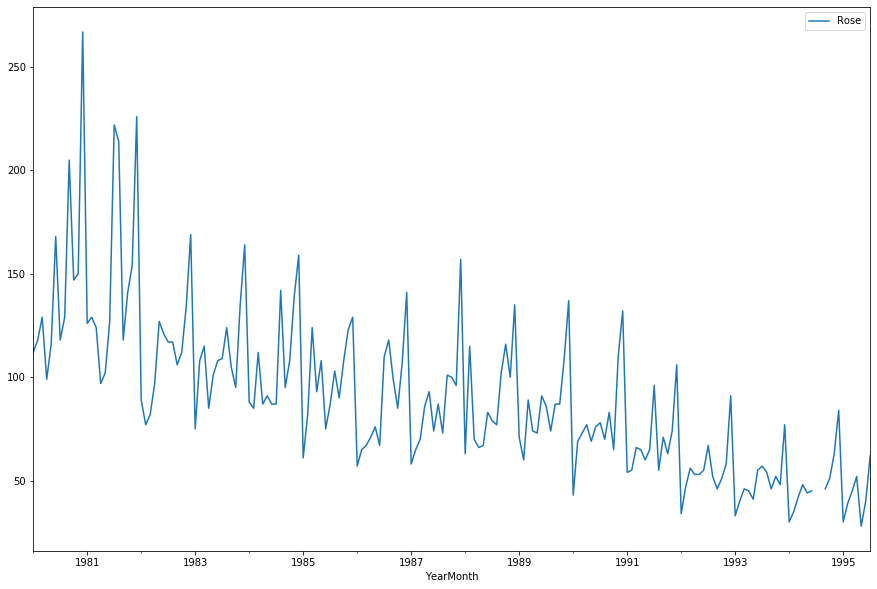

In [551]:
rose.plot(figsize = (15,10))

In [552]:
#Checking the number of rows and columns
print("The number of rows: ",rose.shape[0], "\n""The number of columns: ",rose.shape[1])

The number of rows:  187 
The number of columns:  1


In [553]:
rose.isnull().sum()

Rose    2
dtype: int64

There are 2 null values in the dataset which we need to treat before going further into model building. I have imputed using linear interpolation.

In [554]:
bool_series = pd.isnull(rose['Rose'])
rose[bool_series]

,Rose
YearMonth,
1994-07-01,NaN
1994-08-01,NaN


July 1994 and August 1994 has Nan Values which needs to be treated.I have imputed using linear interpolation.

In [555]:
rose1   = rose.interpolate(method = 'linear')

In [556]:
rose1.isnull().sum()

Rose    0
dtype: int64

After interpolation, there are no null values present in the dataset.

In [557]:
rose1[bool_series]

,Rose
YearMonth,
1994-07-01,45.333333
1994-08-01,45.666667


In [558]:
rose = rose1.copy()

In [559]:
rose.isnull().sum()

Rose    0
dtype: int64

# Years Box Plot

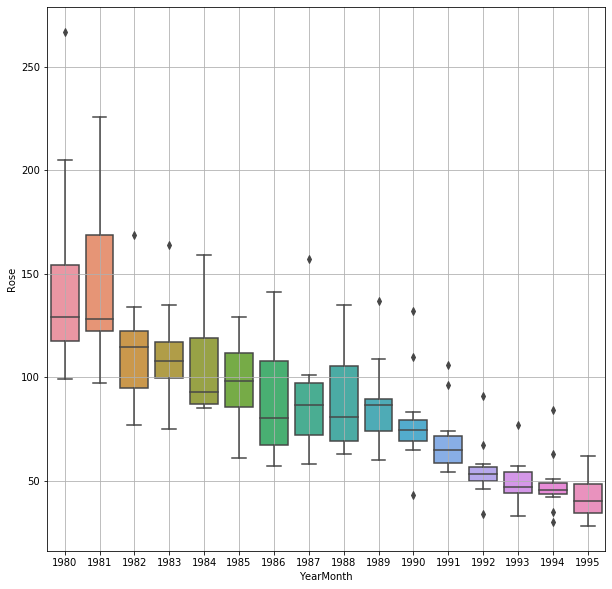

In [560]:
plt.figure(figsize = (10,10))
sns.boxplot(x = rose.index.year,y = rose['Rose'])
plt.grid();

As we can see, sales of Rose wine is declining every year

# Box Plot of Monthly Sales Data

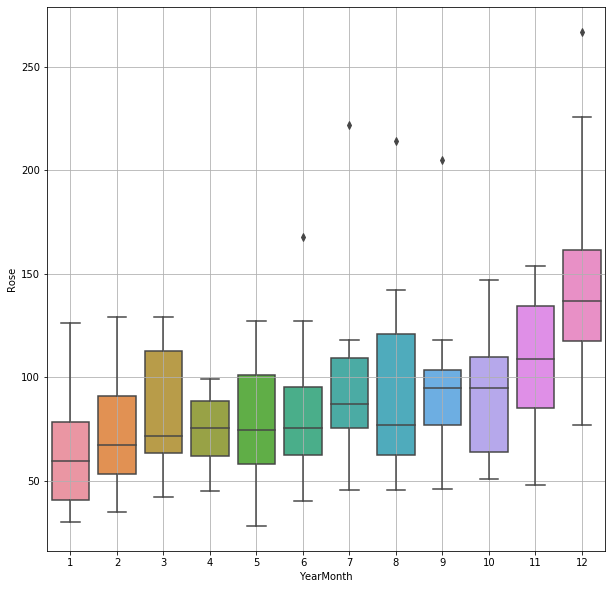

In [561]:
plt.figure(figsize = (10,10))
sns.boxplot(x = rose.index.month,y = rose['Rose'])
plt.grid();

The sales is showing a steady increase month on month and highest for december month as seen from the box plot above.

<Figure size 1080x1080 with 0 Axes>

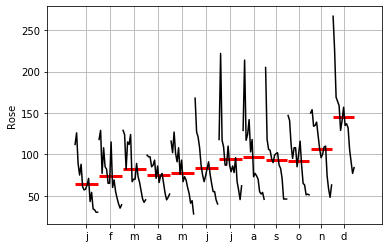

In [562]:
from statsmodels.graphics.tsaplots import month_plot
plt.figure(figsize = (15, 15))
month_plot(rose['Rose'],ylabel='Rose')
plt.grid();

This plot shows us the behaviour of the Time Series ('Rose' in this case) across various months. The red line is the median value.

# Plot a graph of monthly sales across the years

In [563]:
monthly_sales_across_years = pd.pivot_table(rose, values = 'Rose', columns = rose.index.month, index = rose.index.year)
monthly_sales_across_years

YearMonth,1,2,3,4,5,6,7,8,9,10,11,12
YearMonth,,,,,,,,,,,,
1980,112.0,118.0,129.0,99.0,116.0,168.0,118.000000,129.000000,205.0,147.0,150.0,267.0
1981,126.0,129.0,124.0,97.0,102.0,127.0,222.000000,214.000000,118.0,141.0,154.0,226.0
1982,89.0,77.0,82.0,97.0,127.0,121.0,117.000000,117.000000,106.0,112.0,134.0,169.0
1983,75.0,108.0,115.0,85.0,101.0,108.0,109.000000,124.000000,105.0,95.0,135.0,164.0
1984,88.0,85.0,112.0,87.0,91.0,87.0,87.000000,142.000000,95.0,108.0,139.0,159.0
1985,61.0,82.0,124.0,93.0,108.0,75.0,87.000000,103.000000,90.0,108.0,123.0,129.0
1986,57.0,65.0,67.0,71.0,76.0,67.0,110.000000,118.000000,99.0,85.0,107.0,141.0
1987,58.0,65.0,70.0,86.0,93.0,74.0,87.000000,73.000000,101.0,100.0,96.0,157.0
1988,63.0,115.0,70.0,66.0,67.0,83.0,79.000000,77.000000,102.0,116.0,100.0,135.0


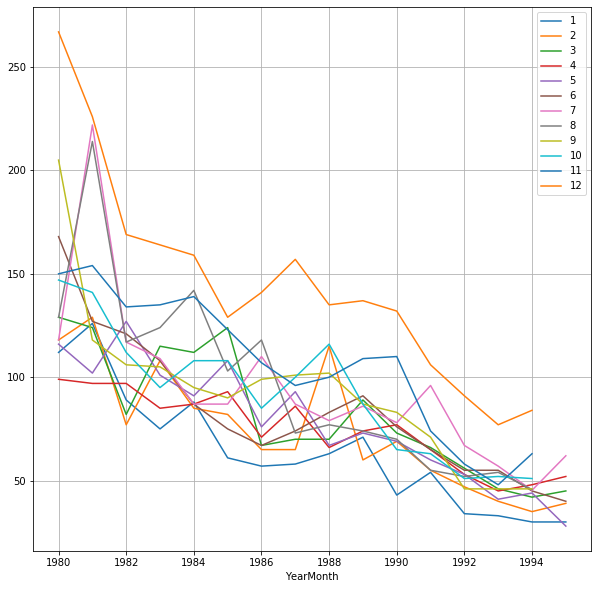

In [564]:
monthly_sales_across_years.plot(figsize = (10,10))
plt.grid()
plt.legend(loc='best');

# Plotting the Empirical Cumulative Distribution

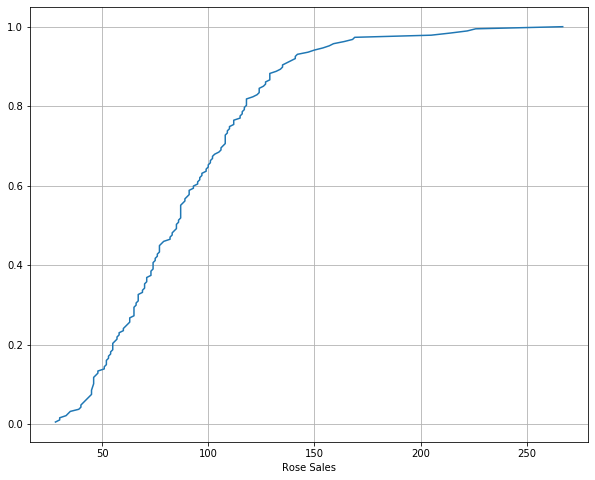

In [565]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (10, 8))
cdf = ECDF(rose['Rose'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Rose Sales');

This particular graph tells us what percentage of data points refer to what number of Sales.

# Plot the average RoseSales per month and the month on month percentage change of RoseSales.

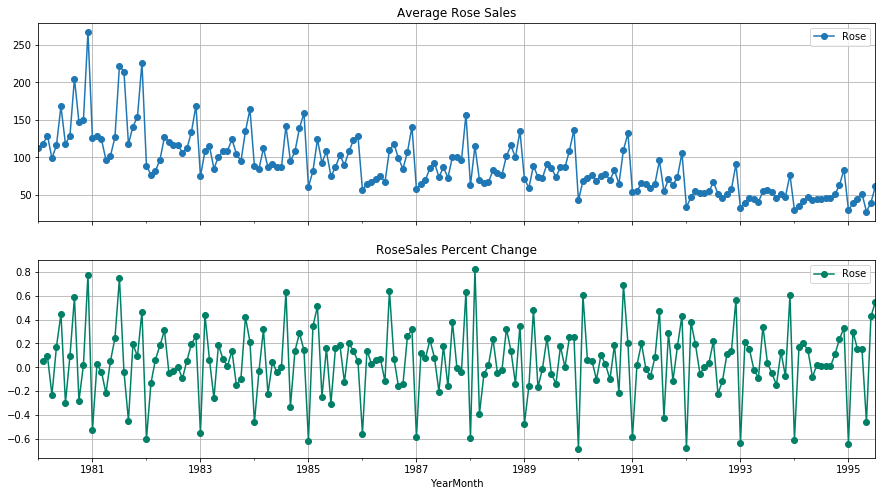

In [566]:
# group by date and get average RoseSales, and precent change
average    = rose.groupby(rose.index)["Rose"].mean()
pct_change = rose.groupby(rose.index)["Rose"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average RoseSales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Rose Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for RoseSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="RoseSales Percent Change",grid=True)

The above two graphs tells us the Average 'RoseSales' and the Percentage change of 'RoseSales' with respect to the time.

# Decomposition of Time Series and plotting different components

In [567]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

# Additive Decomposition

<Figure size 1080x1080 with 0 Axes>

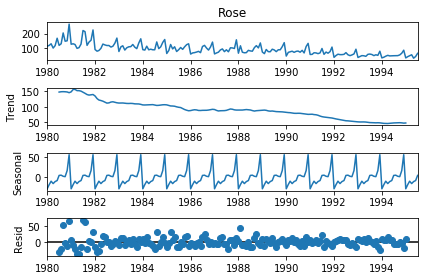

In [568]:
plt.figure(figsize = (15,15))
decomposition = seasonal_decompose(rose['Rose'],model='additive')
decomposition.plot();

We see that the residuals are located around 0 from the plot of the residuals in the decomposition.

# Multiplicative Decomposition

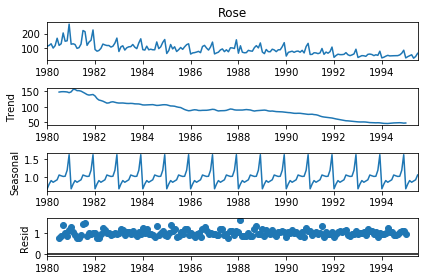

In [569]:
decomposition = seasonal_decompose(rose['Rose'],model='multiplicative')
decomposition.plot();

For the multiplicative series, we see that a lot of residuals are located around 1. Hence we can say the series is additive in nature with a declining trend.

# Splitting the Data into Train and Test

In [570]:
#splitting the data into train| and test. 
train  = rose[0:int(len(rose)*0.71)] 
test = rose[int(len(rose)*0.71):]

In [571]:
#checking if the train test split has been done properly
print("Training Data starting point {}".format(train.head()))
print("\n Training Data ending point {}".format(train.tail()))

print("\n Test Data starting point {}".format(test.head()))
print("\n Test Data ending point {}".format(test.tail()))


Training Data starting point              Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

 Training Data ending point              Rose
YearMonth        
1990-08-01   70.0
1990-09-01   83.0
1990-10-01   65.0
1990-11-01  110.0
1990-12-01  132.0

 Test Data starting point             Rose
YearMonth       
1991-01-01  54.0
1991-02-01  55.0
1991-03-01  66.0
1991-04-01  65.0
1991-05-01  60.0

 Test Data ending point             Rose
YearMonth       
1995-03-01  45.0
1995-04-01  52.0
1995-05-01  28.0
1995-06-01  40.0
1995-07-01  62.0


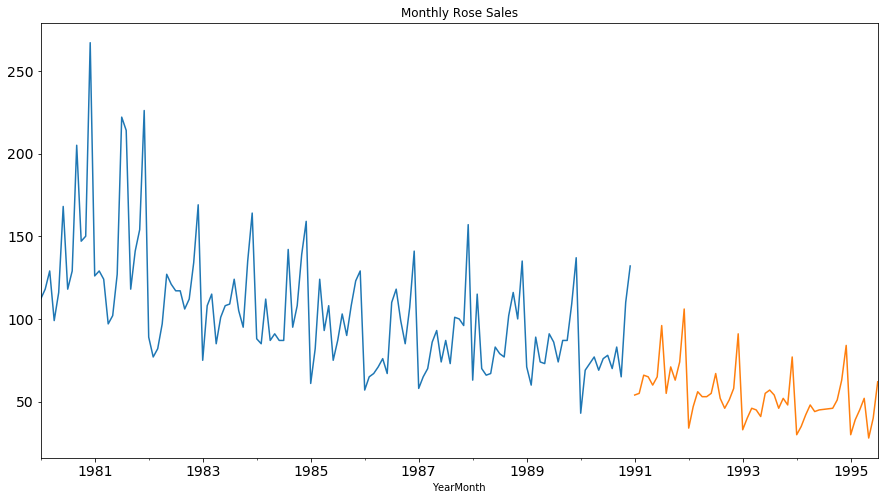

In [572]:
#plotting the train and test dataset
train['Rose'].plot(figsize=(15,8), title= 'Monthly Rose Sales', fontsize=14)
test['Rose'].plot(figsize=(15,8), title= 'Monthly Rose Sales', fontsize=14)

# Building the models

In [573]:
#Defining MAPE function
def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

# Naive Approach

The forecast will be same as the last value.

In [574]:
dd= np.asarray(train.Rose)
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]

Text(0.5, 1.0, 'Naive Forecast')

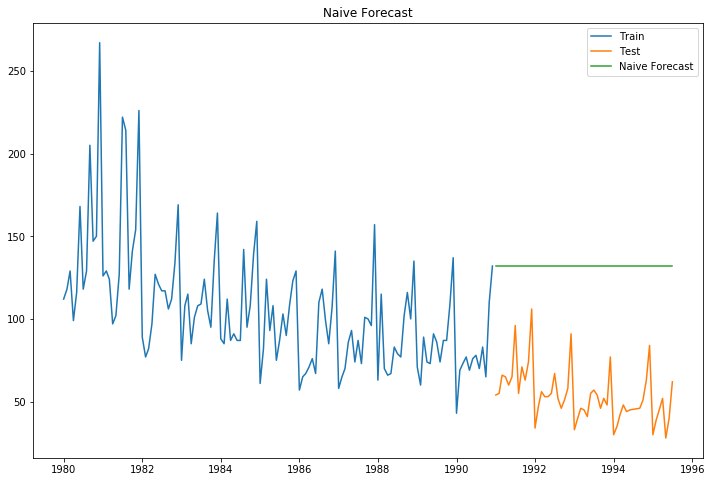

In [575]:
plt.figure(figsize=(12,8))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")

In [576]:
from   sklearn.metrics   import mean_squared_error
from   math              import sqrt
rmse = sqrt(mean_squared_error(test.Rose, y_hat.naive))
rmse = round(rmse, 3)
mape = MAPE(test.Rose, y_hat.naive)
print("For Naive model,  RMSE is %3.3f MAPE is %3.2f" %(rmse, mape))

For Naive model,  RMSE is 79.719 MAPE is 145.10


In [577]:
resultsDf = pd.DataFrame({'Method':['Naive Model'], 'rmse': [rmse], 'mape' : [mape]})
resultsDf

,Method,rmse,mape
0,Naive Model,79.719,145.1


# Simple Average Model

In [578]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = rose['Rose'].mean()

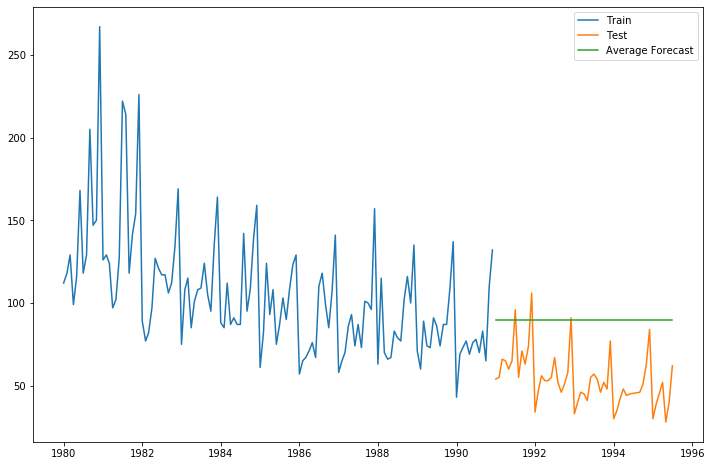

In [579]:
#Plotting the original train and test data with avergae forecast
plt.figure(figsize=(12,8))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')

As we can see from the graph, the predicted values for test data set is the average of all the values from training data.

In [580]:
rmse = sqrt(mean_squared_error(test.Rose, y_hat_avg.avg_forecast))
rmse = round(rmse, 3)
mape = MAPE(test.Rose, y_hat_avg.avg_forecast)
print("For Simple Average model,  RMSE is %3.3f MAPE is %3.2f" %(rmse, mape))

For Simple Average model,  RMSE is 39.353 MAPE is 68.53


In [581]:
tempResultsDf = pd.DataFrame({'Method':['Simple Average'], 'rmse': [rmse], 'mape' : [mape]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,rmse,mape
0,Naive Model,79.719,145.10
0,Simple Average,39.353,68.53


# Moving Average

In [582]:
#Moving averages for a windoe of 3,6, 9 and 12 month windows
rose1 = rose.copy()
rose1['MA_3'] = rose1.Rose.rolling(3).mean()
rose1['MA_6'] = rose1.Rose.rolling(6).mean()
rose1['MA_9'] = rose1.Rose.rolling(9).mean()
rose1['MA_12'] = rose1.Rose.rolling(12).mean()

For Moving Average model, MA_3  RMSE is 14.127 MAPE is 18.30
For Moving Average model, MA_6  RMSE is 14.566 MAPE is 20.82
For Moving Average model, MA_9  RMSE is 14.728 MAPE is 21.01
For Moving Average model, MA_12  RMSE is 15.236 MAPE is 22.07


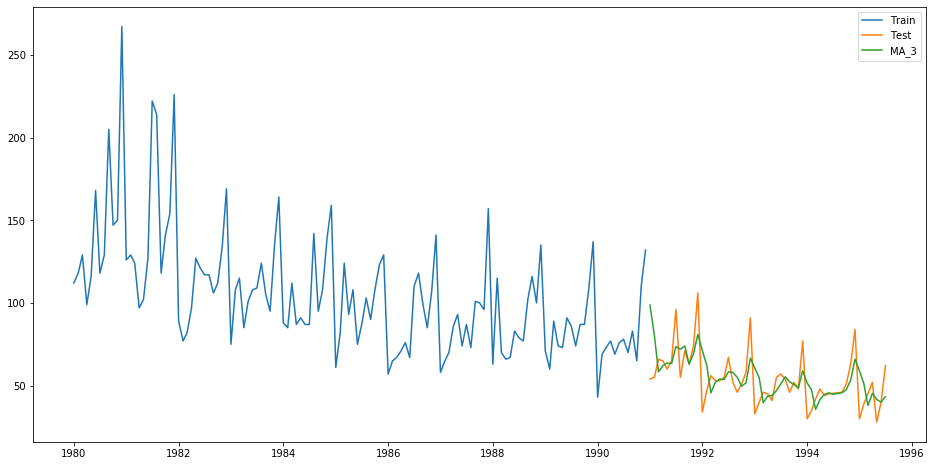

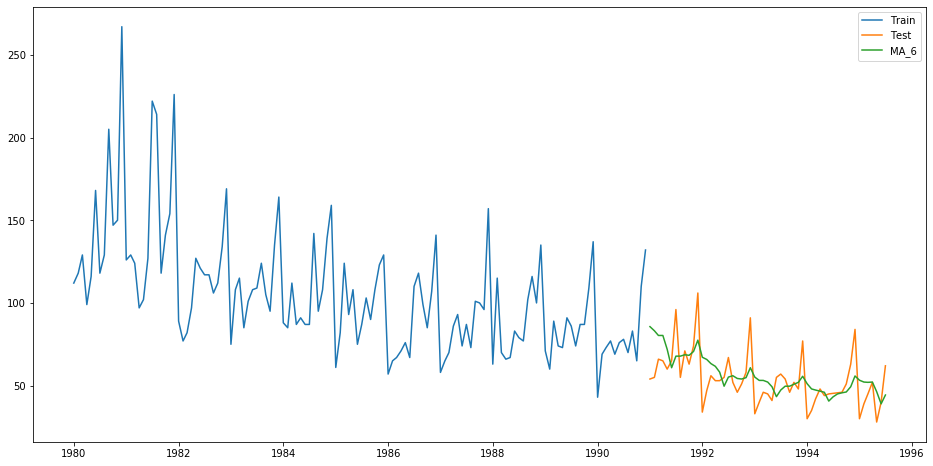

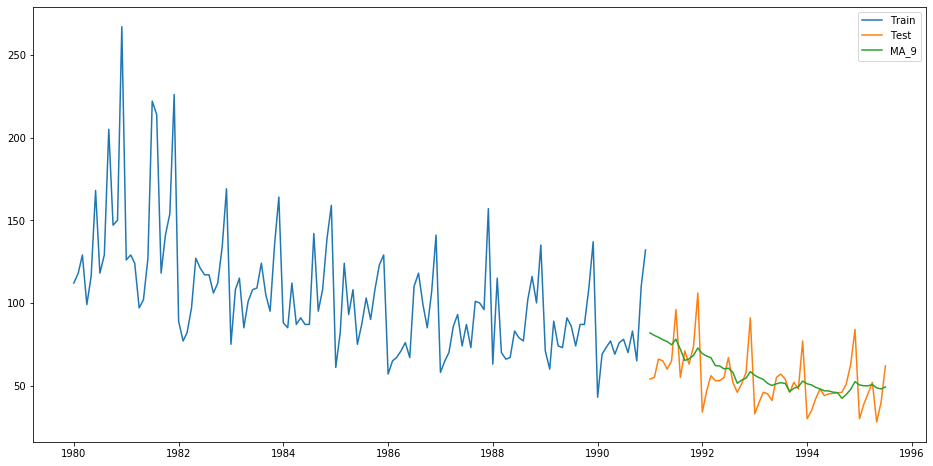

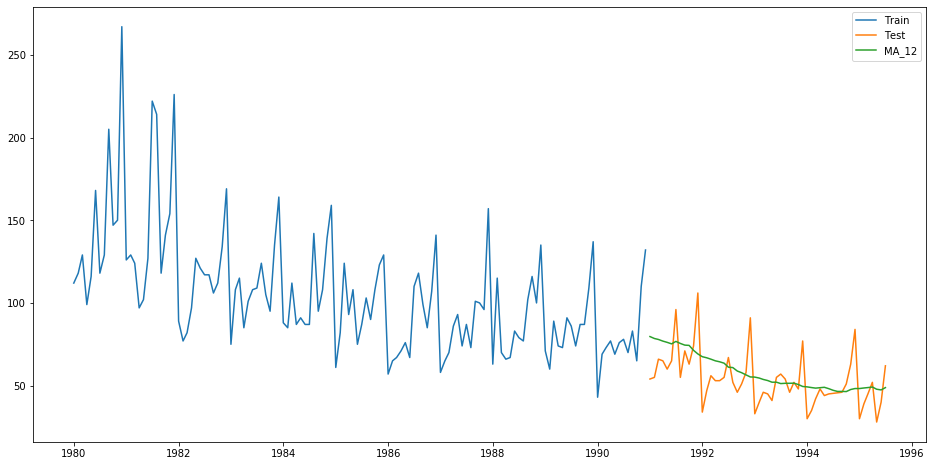

In [583]:
cols = ['MA_3', 'MA_6', 'MA_9', 'MA_12']

#creating train test split
train_1=rose1[0:int(len(rose1)*0.71)] 
test_1=rose1[int(len(rose1)*0.71):]

y_hat_avg = test_1.copy()

for col_name in cols:
    
    plt.figure(figsize=(16,8))
    plt.plot(train_1['Rose'], label='Train')
    plt.plot(test_1['Rose'], label='Test')
    plt.plot(y_hat_avg[col_name], label = col_name)
    plt.legend(loc = 'best')
    rmse = sqrt(mean_squared_error(test_1.Rose, y_hat_avg[col_name]))
    rmse = round(rmse, 3)
    mape = MAPE(test_1.Rose, y_hat_avg[col_name])
    print("For Moving Average model, %s  RMSE is %3.3f MAPE is %3.2f" %(col_name, rmse, mape))
    tempResultsDf = pd.DataFrame({'Method':[col_name], 'rmse': [rmse], 'mape' : [mape]})
    resultsDf = pd.concat([resultsDf, tempResultsDf])


In [584]:
print(resultsDf)

           Method    rmse    mape
0     Naive Model  79.719  145.10
0  Simple Average  39.353   68.53
0            MA_3  14.127   18.30
0            MA_6  14.566   20.82
0            MA_9  14.728   21.01
0           MA_12  15.236   22.07


# Regression on time


In [585]:
rose1         =   rose.copy() # Make a copy
time        = [i+1 for i in range(len(rose))]
rose1['time'] = time
rose1

,Rose,time
YearMonth,,
1980-01-01,112.0,1
1980-02-01,118.0,2
1980-03-01,129.0,3
1980-04-01,99.0,4
1980-05-01,116.0,5
...,...,...
1995-03-01,45.0,183
1995-04-01,52.0,184
1995-05-01,28.0,185


In [586]:
#Creating train and test dataset
train=rose1[0:int(len(rose1)*0.71)] 
test=rose1[int(len(rose1)*0.71):]

train.head()
test.head()

,Rose,time
YearMonth,,
1991-01-01,54.0,133
1991-02-01,55.0,134
1991-03-01,66.0,135
1991-04-01,65.0,136
1991-05-01,60.0,137


In [587]:
x_train = train.drop('Rose', axis=1)
x_test  = test.drop('Rose', axis=1)
y_train = train[['Rose']]
y_test  = test[['Rose']]

In [588]:
from sklearn.linear_model import LinearRegression

In [589]:
model = LinearRegression()

In [590]:
model.fit(x_train, y_train)

LinearRegression()

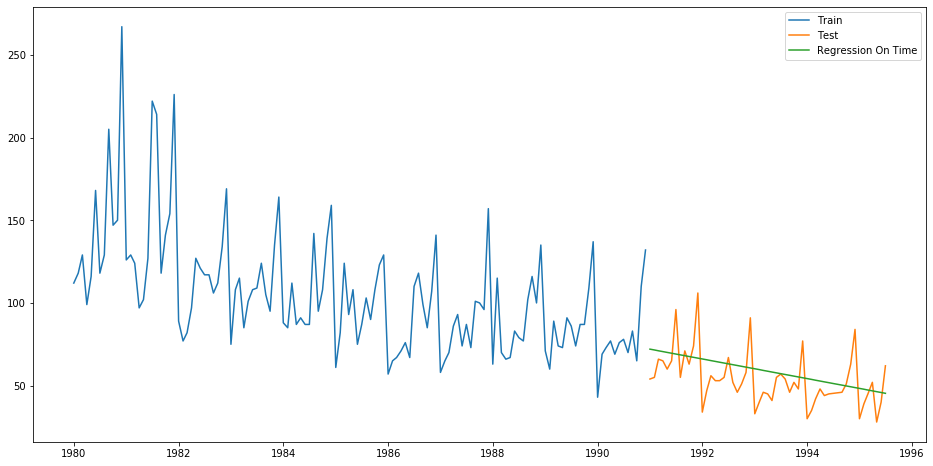

In [591]:
predictions         = model.predict(x_test)
y_test['RegOnTime'] = predictions

plt.figure(figsize=(16,8))
plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(y_test['RegOnTime'], label='Regression On Time')
plt.legend(loc='best')

In [592]:
rmse = sqrt(mean_squared_error(test.Rose, y_test.RegOnTime))
rmse = round(rmse, 3)
mape = MAPE(test.Rose, y_test.RegOnTime)
print("For RegressionOnTime,  RMSE is %3.3f MAPE is %3.2f" %(rmse, mape))

For RegressionOnTime,  RMSE is 15.269 MAPE is 22.82


In [593]:
tempResultsDf = pd.DataFrame({'Method': "Linear Regression on Time", 'rmse': [rmse], 'mape' : [mape]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,rmse,mape
0,Naive Model,79.719,145.10
0,Simple Average,39.353,68.53
0,MA_3,14.127,18.30
0,MA_6,14.566,20.82
0,MA_9,14.728,21.01
0,MA_12,15.236,22.07
0,Linear Regression on Time,15.269,22.82


# Single Exponential Smoothing 

Only captures the level in the time series.

In [594]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
model = SimpleExpSmoothing(train['Rose'])

In [595]:
#finding the value of alpha from the training dataset
model_fit = model.fit(optimized = True)
print('== Simple Exponential Smoothing \n')
print('Smoothing Level', np.round(model_fit.params['smoothing_level'], 4))
print('Initial Level',   np.round(model_fit.params['initial_level'], 4))

== Simple Exponential Smoothing 

Smoothing Level 0.0987
Initial Level 134.387


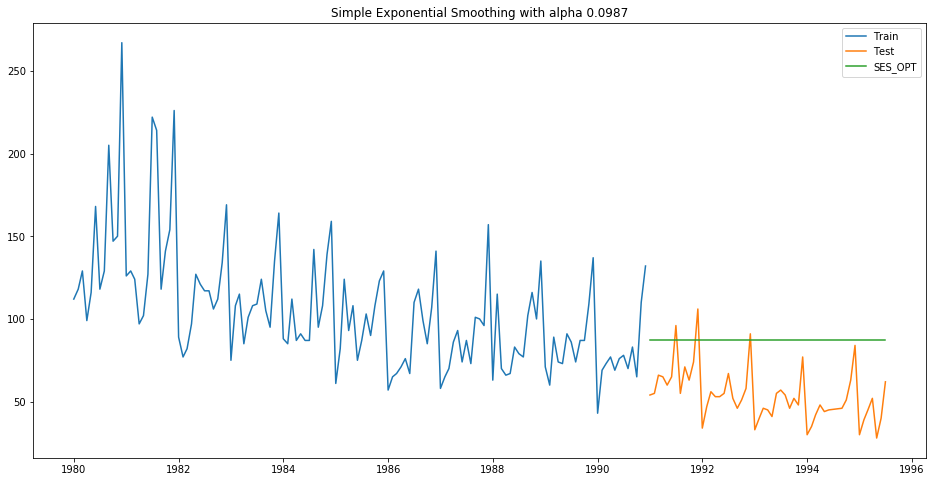

In [596]:
#forecasting the values for test dataset
y_hat_avg['SES']     = model_fit.forecast(len(test['Rose']))

alpha_value          = np.round(model_fit.params['smoothing_level'], 4)


plt.figure(figsize=(16,8))
plt.plot(train['Rose'], label = 'Train')
plt.plot(test['Rose'],   label = 'Test')
plt.plot(y_hat_avg.SES,   label = 'SES_OPT')
plt.title('Simple Exponential Smoothing with alpha ' + str(alpha_value))
plt.legend(loc='best') 
plt.show()

In [597]:
#Model Validation
rmse_opt             =  np.sqrt(mean_squared_error(test['Rose'], y_hat_avg.SES))
mape_opt             =  MAPE(test['Rose'], y_hat_avg.SES)

print("For alpha = %1.2f,  RMSE is %3.4f MAPE is %3.2f" %(alpha_value, rmse_opt, mape_opt))

For alpha = 0.10,  RMSE is 36.7962 MAPE is 63.88


In [598]:
tempResultsDf = pd.DataFrame({'Method': 'SES', 'rmse': [rmse_opt], 'mape' : [mape_opt]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
print(resultsDf)

                      Method       rmse    mape
0                Naive Model  79.719000  145.10
0             Simple Average  39.353000   68.53
0                       MA_3  14.127000   18.30
0                       MA_6  14.566000   20.82
0                       MA_9  14.728000   21.01
0                      MA_12  15.236000   22.07
0  Linear Regression on Time  15.269000   22.82
0                        SES  36.796244   63.88


# Double Exponential Model

As the series has a level and trend, we should go ahead and build the double exponential i.e. holt's model to capture both - level and trend

In [599]:
#Picking both - the level and trend from the time series to build the model
model = Holt(np.asarray(train['Rose']))
model_fit = model.fit()
alpha_value = np.round(model_fit.params['smoothing_level'], 4)
print('Smoothing Level', alpha_value )
print('Smoothing Slope', np.round(model_fit.params['smoothing_slope'], 4))
print('Initial Level',   np.round(model_fit.params['initial_level'], 4))

Smoothing Level 0.1579
Smoothing Slope 0.1579
Initial Level 112.0


In [600]:
#forecasting for test dataset
Pred_Holt = test.copy()
Pred_Holt['Opt'] = model_fit.forecast(len(test['Rose']))

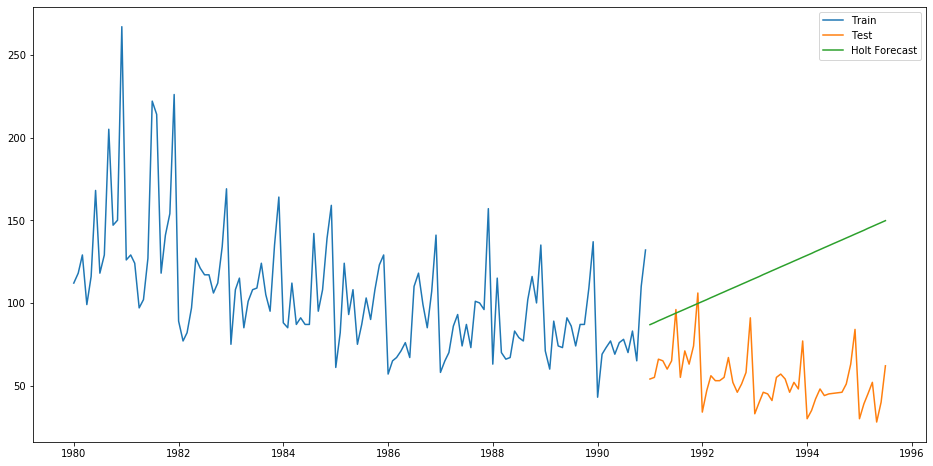

In [601]:
#plotting the original train and test data and forecasted values
plt.figure(figsize=(16,8))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(Pred_Holt['Opt'], label='Holt Forecast')
plt.legend(loc='best')
plt.show()

In [602]:
#Model Evaluation using RMSE and MAPE
df_pred_opt          =  pd.DataFrame({'Y_hat':Pred_Holt['Opt'] ,'Y':test['Rose'].values})

rmse_opt             =  np.sqrt(mean_squared_error(df_pred_opt.Y, df_pred_opt.Y_hat))
mape_opt             =  MAPE(df_pred_opt.Y, df_pred_opt.Y_hat)

print("For alpha = %1.2f,  RMSE is %3.4f MAPE is %3.2f" %(alpha_value, rmse_opt, mape_opt))

For alpha = 0.16,  RMSE is 70.5725 MAPE is 120.25


In [603]:
tempResultsDf = pd.DataFrame({'Method': 'Holt Model', 'rmse': [rmse_opt], 'mape' : [mape_opt]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
print(resultsDf)

                      Method       rmse    mape
0                Naive Model  79.719000  145.10
0             Simple Average  39.353000   68.53
0                       MA_3  14.127000   18.30
0                       MA_6  14.566000   20.82
0                       MA_9  14.728000   21.01
0                      MA_12  15.236000   22.07
0  Linear Regression on Time  15.269000   22.82
0                        SES  36.796244   63.88
0                 Holt Model  70.572452  120.25


# Holt Winter's Model - Additive Seasonality

In [604]:
#Picking all 3 components of time series i.e. level, trend and seasonlity to build the model - using additive approach for seasonal component
y_hat_avg = test.copy()
model_fit = ExponentialSmoothing(np.asarray(train['Rose']) ,seasonal_periods = 12 ,trend='add', seasonal='add').fit()

In [605]:
alpha_value = np.round(model_fit.params['smoothing_level'], 4)
beta_value  = np.round(model_fit.params['smoothing_slope'], 4)
gamma_value = np.round(model_fit.params['smoothing_seasonal'], 4) 

print('Smoothing Level: ', alpha_value)
print('Smoothing Slope: ', beta_value)
print('Smoothing Seasonal: ', gamma_value)
print('Initial Level: ', np.round(model_fit.params['initial_level'], 4))
print('Initial Slope: ', np.round(model_fit.params['initial_slope'], 4))
print('Initial Seasons: ', np.round(model_fit.params['initial_seasons'], 4))

Smoothing Level:  0.1335
Smoothing Slope:  0.0138
Smoothing Seasonal:  0.0
Initial Level:  77.91
Initial Slope:  0.0
Initial Seasons:  [ 37.1935  49.5345  57.4534  46.8246  55.5675  60.9979  70.9483  76.9558
  72.9855  71.1149  89.1826 131.3812]


In [606]:
#forecasting for the test dataset
y_hat_avg['Holt_Winter'] = model_fit.forecast(len(test))

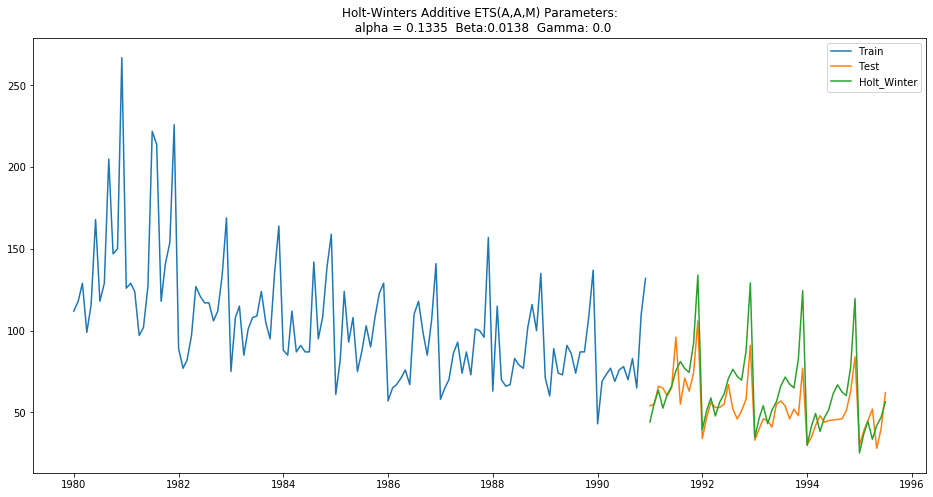

In [607]:
#plotting the original time series (train and test data) and forecasted time series
plt.figure(figsize=(16,8))
plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.title('Holt-Winters Additive ETS(A,A,M) Parameters:\n  alpha = ' + 
          str(alpha_value) + '  Beta:' + 
          str(beta_value) +
          '  Gamma: ' + str(gamma_value))
plt.legend(loc='best')

In [608]:
#model evaluation using RMSE and MAPE
rmse_opt             =  np.sqrt(mean_squared_error(test['Rose'], y_hat_avg['Holt_Winter']))
mape_opt             =  MAPE(test['Rose'], y_hat_avg['Holt_Winter'])

print("For alpha = %1.2f, beta = %1.2f, gamma = %1.2f, RMSE is %3.4f MAPE is %3.2f" %(alpha_value, beta_value, gamma_value, rmse_opt, mape_opt))

For alpha = 0.13, beta = 0.01, gamma = 0.00, RMSE is 16.4432 MAPE is 22.86


In [609]:
tempResultsDf = pd.DataFrame({'Method': 'Holt_Winter (Additive Model)', 'rmse': [rmse_opt], 'mape' : [mape_opt]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
print(resultsDf)

                         Method       rmse    mape
0                   Naive Model  79.719000  145.10
0                Simple Average  39.353000   68.53
0                          MA_3  14.127000   18.30
0                          MA_6  14.566000   20.82
0                          MA_9  14.728000   21.01
0                         MA_12  15.236000   22.07
0     Linear Regression on Time  15.269000   22.82
0                           SES  36.796244   63.88
0                    Holt Model  70.572452  120.25
0  Holt_Winter (Additive Model)  16.443203   22.86


# Holt-Winters Method - Multiplicative Model 

In [610]:
#building the multiplicative model to compare with the results of other models
y_hat_avg = test.copy()
model_fit = ExponentialSmoothing(np.asarray(train['Rose']) ,seasonal_periods = 12 ,trend='add', seasonal='mul').fit()

In [611]:
#printing values of alpha, beta, gamma 
print('== Holt-Winters Multplicative ETS(A,A,M) Parameters == \n')

alpha_value = np.round(model_fit.params['smoothing_level'], 4)
beta_value  = np.round(model_fit.params['smoothing_slope'], 4)
gamma_value = np.round(model_fit.params['smoothing_seasonal'], 4) 

print('Smoothing Level: ', alpha_value)
print('Smoothing Slope: ', beta_value)
print('Smoothing Seasonal: ', gamma_value)
print('Initial Level: ', np.round(model_fit.params['initial_level'], 4))
print('Initial Slope: ', np.round(model_fit.params['initial_slope'], 4))
print('Initial Seasons: ', np.round(model_fit.params['initial_seasons'], 4))

== Holt-Winters Multplicative ETS(A,A,M) Parameters == 

Smoothing Level:  0.1061
Smoothing Slope:  0.0484
Smoothing Seasonal:  0.0
Initial Level:  76.6557
Initial Slope:  0.0
Initial Seasons:  [1.4755 1.6593 1.8057 1.5889 1.7782 1.926  2.1165 2.2514 2.1169 2.0811
 2.4093 3.3045]


In [612]:
#forecasting for test data
y_hat_avg['Holt_Winter_M'] = model_fit.forecast(len(test))

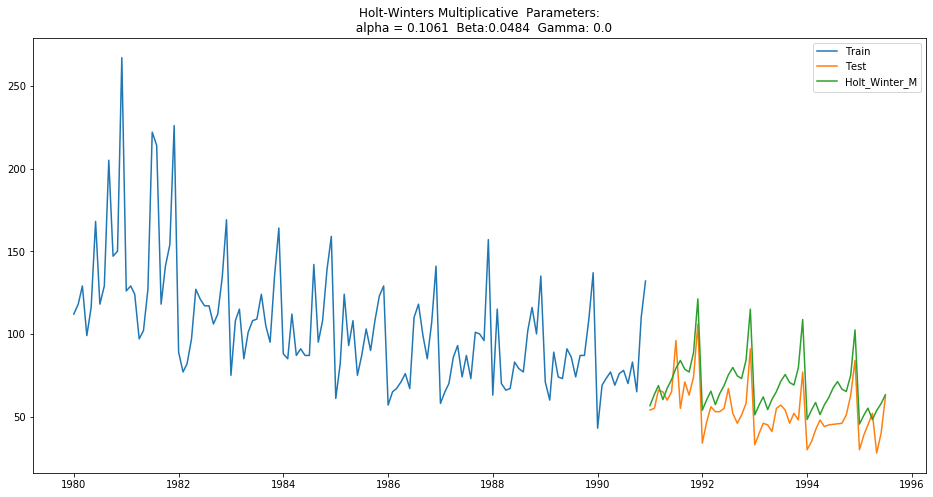

In [613]:
#Plotting the original series and forecasted series 
plt.figure(figsize=(16,8))
plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(y_hat_avg['Holt_Winter_M'], label='Holt_Winter_M')
plt.title('Holt-Winters Multiplicative  Parameters:\n  alpha = ' + 
          str(alpha_value) + '  Beta:' + 
          str(beta_value) +
          '  Gamma: ' + str(gamma_value))
plt.legend(loc='best')

In [614]:
#model evaluation using RMSE and MAPE
rmse_opt             =  np.sqrt(mean_squared_error(test['Rose'], y_hat_avg['Holt_Winter_M']))
mape_opt             =  MAPE(test['Rose'], y_hat_avg['Holt_Winter_M'])

print("For alpha = %1.2f, beta = %1.2f, gamma = %1.2f, RMSE is %3.4f MAPE is %3.2f" %(alpha_value, beta_value, gamma_value, rmse_opt, mape_opt))

For alpha = 0.11, beta = 0.05, gamma = 0.00, RMSE is 17.3695 MAPE is 28.88


In [615]:
tempResultsDf = pd.DataFrame({'Method': 'Holt_Winter M', 'rmse': [rmse_opt], 'mape' : [mape_opt]})
resultsDf = pd.concat([resultsDf, tempResultsDf])

In [616]:
print(resultsDf.sort_values(by = 'rmse'))

                         Method       rmse    mape
0                          MA_3  14.127000   18.30
0                          MA_6  14.566000   20.82
0                          MA_9  14.728000   21.01
0                         MA_12  15.236000   22.07
0     Linear Regression on Time  15.269000   22.82
0  Holt_Winter (Additive Model)  16.443203   22.86
0                 Holt_Winter M  17.369489   28.88
0                           SES  36.796244   63.88
0                Simple Average  39.353000   68.53
0                    Holt Model  70.572452  120.25
0                   Naive Model  79.719000  145.10


# Checking for the stationarity of the Timeseries    

In [617]:
from statsmodels.tsa.stattools import adfuller

In [618]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

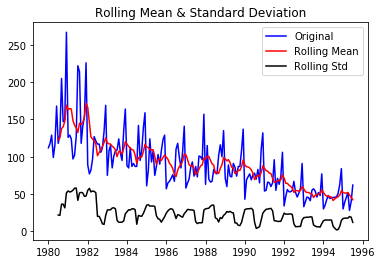

Results of Dickey-Fuller Test:
Test Statistic                  -1.876699
p-value                          0.343101
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [619]:
test_stationarity(rose['Rose'])

H0 = Time series is not stationary

Ha = Time series is stationary

As the p value is much higher than .05, we fail to reject the null hypothesis i.e. the series is not stationary. Same thing can also be observed from the graph where we can cleary see a seasonal component and trend as well. Hence we need to convert the non stationary series to stationary series in order to perform ARIMA, SARIMA Models.

Let us take a difference of order 1 and check whether the Time Series is stationary or not.

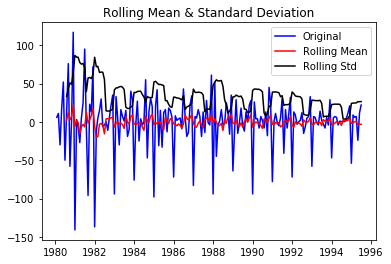

Results of Dickey-Fuller Test:
Test Statistic                -8.044392e+00
p-value                        1.810895e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [620]:
test_stationarity(rose['Rose'].diff().dropna())

We see that after taking a difference of order 1 the series have become stationary at alpha = 0.05.

# Building AUTO ARIMA Model in which the parameters of the model is chosen based on Lowese AIC and BIC values

As the model has seasonality as well, we should ideally build SARIMA model, but ARIMA model building is just for demonstration purpose.

In [621]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [622]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [623]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Rose'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1335.1526583086775
ARIMA(0, 1, 1) - AIC:1280.7261830464226
ARIMA(0, 1, 2) - AIC:1276.8353736830445
ARIMA(1, 1, 0) - AIC:1319.3483105806022
ARIMA(1, 1, 1) - AIC:1277.7757578817404
ARIMA(1, 1, 2) - AIC:1277.3592235584763
ARIMA(2, 1, 0) - AIC:1300.609261174395
ARIMA(2, 1, 1) - AIC:1279.045689409317
ARIMA(2, 1, 2) - AIC:1279.2986939364996


In [624]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
2,"(0, 1, 2)",1276.835374
5,"(1, 1, 2)",1277.359224
4,"(1, 1, 1)",1277.775758
7,"(2, 1, 1)",1279.045689
8,"(2, 1, 2)",1279.298694
1,"(0, 1, 1)",1280.726183
6,"(2, 1, 0)",1300.609261
3,"(1, 1, 0)",1319.348311
0,"(0, 1, 0)",1335.152658


In [625]:
#Building the model using the best parameters based on lowest AIC value i.e. 0,1,2 and 1276.8353
auto_ARIMA = ARIMA(train['Rose'], order=(0,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -634.418
Method:                       css-mle   S.D. of innovations             30.167
Date:                Sun, 13 Sep 2020   AIC                           1276.835
Time:                        18:07:40   BIC                           1288.336
Sample:                    02-01-1980   HQIC                          1281.509
                         - 12-01-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4885      0.085     -5.742      0.000      -0.655      -0.322
ma.L1.D.Rose    -0.7601      0.101     -7.499      0.000      -0.959      -0.561
ma.L2.D.Rose    -0.2398      0.095     -2.51

# Predict on the Test Set using this model and evaluate the model.


In [626]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [627]:
rmse = mean_squared_error(test['Rose'],predicted_auto_ARIMA[0],squared=False)
print(rmse)

15.618281486391918


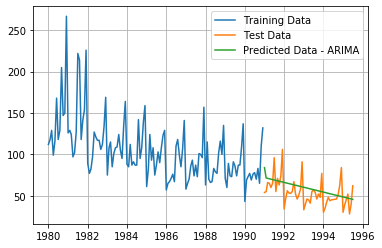

In [628]:
plt.plot(train.Rose,label='Training Data')
plt.plot(test.Rose,label='Test Data')
plt.plot(test.index,predicted_auto_ARIMA[0],label='Predicted Data - ARIMA')
plt.legend(loc='best')
plt.grid();

In [629]:
resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(0,1,2)'])

resultsDf

,RMSE
"ARIMA(0,1,2)",15.618281


# Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

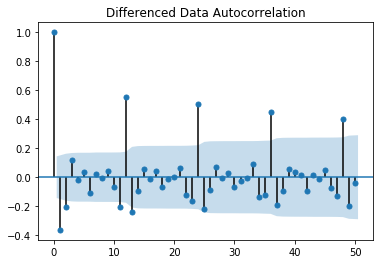

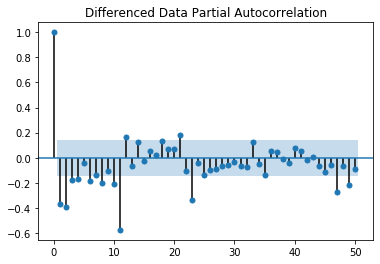

In [630]:
#lets look at ACF and PACF curve to understand the seaonal parameter
plot_acf(rose['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(rose['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

We see that there can be a seasonality of 12. We will run our auto SARIMA models by setting seasonality as 12.

In [631]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(1,2)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 1, 1, 12)
Model: (0, 1, 2)(0, 1, 2, 12)
Model: (1, 1, 0)(1, 1, 0, 12)
Model: (1, 1, 1)(1, 1, 1, 12)
Model: (1, 1, 2)(1, 1, 2, 12)
Model: (2, 1, 0)(2, 1, 0, 12)
Model: (2, 1, 1)(2, 1, 1, 12)
Model: (2, 1, 2)(2, 1, 2, 12)


In [632]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [633]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 1, 0, 12)7 - AIC:1171.2013438278946
SARIMA(0, 1, 0)x(0, 1, 1, 12)7 - AIC:965.5057301635144
SARIMA(0, 1, 0)x(0, 1, 2, 12)7 - AIC:845.8687014776121
SARIMA(0, 1, 0)x(1, 1, 0, 12)7 - AIC:982.326958965881
SARIMA(0, 1, 0)x(1, 1, 1, 12)7 - AIC:975.3375383601621
SARIMA(0, 1, 0)x(1, 1, 2, 12)7 - AIC:847.7332182654615
SARIMA(0, 1, 0)x(2, 1, 0, 12)7 - AIC:858.5132698374416
SARIMA(0, 1, 0)x(2, 1, 1, 12)7 - AIC:853.3390729147286
SARIMA(0, 1, 0)x(2, 1, 2, 12)7 - AIC:842.6282244221876
SARIMA(0, 1, 1)x(0, 1, 0, 12)7 - AIC:1113.7663133561741
SARIMA(0, 1, 1)x(0, 1, 1, 12)7 - AIC:915.0730606717451
SARIMA(0, 1, 1)x(0, 1, 2, 12)7 - AIC:790.9032809267107
SARIMA(0, 1, 1)x(1, 1, 0, 12)7 - AIC:944.2456655531321
SARIMA(0, 1, 1)x(1, 1, 1, 12)7 - AIC:929.336248852008
SARIMA(0, 1, 1)x(1, 1, 2, 12)7 - AIC:792.716167029386
SARIMA(0, 1, 1)x(2, 1, 0, 12)7 - AIC:810.3194350158634
SARIMA(0, 1, 1)x(2, 1, 1, 12)7 - AIC:804.1555752807257
SARIMA(0, 1, 1)x(2, 1, 2, 12)7 - AIC:782.1538715338198
SARIMA(0, 1

In [635]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
26,"(0, 1, 2)","(2, 1, 2, 12)",774.969121
53,"(1, 1, 2)","(2, 1, 2, 12)",776.940108
80,"(2, 1, 2)","(2, 1, 2, 12)",776.996101
17,"(0, 1, 1)","(2, 1, 2, 12)",782.153872
79,"(2, 1, 2)","(2, 1, 1, 12)",783.703652


In [636]:
#Building the model using the best parameters based on lowest AIC value i.e. (p,d,q) = (0,1,2) and (P,D,Q)= (2,1,2) and 12 months seasonality.

import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -380.485
Date:                            Sun, 13 Sep 2020   AIC                            774.969
Time:                                    18:10:36   BIC                            792.622
Sample:                                         0   HQIC                           782.094
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9523      0.184     -5.162      0.000      -1.314      -0.591
ma.L2         -0.0763      0.126   

<Figure size 720x720 with 0 Axes>

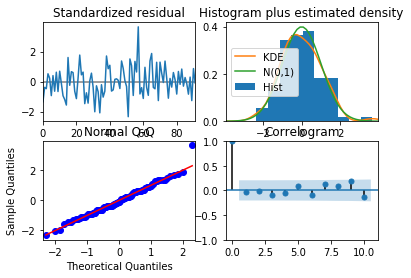

In [637]:
plt.figure(figsize = (10,10))
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

Residuals are normally distributed.
here we see that the model diagnostics plot does not indicate any remaining information that we can get.

# Predict on the Test Set using this model and evaluate the model.

In [638]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

In [639]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,44.212371,14.222434,16.336913,72.087828
1,62.325650,14.301109,34.295991,90.355310
2,67.312308,14.302981,39.278981,95.345635
3,63.160130,14.305853,35.121174,91.199086
4,66.473222,14.311194,38.423797,94.522648


In [640]:
rmse = mean_squared_error(test['Rose'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(rmse)

16.499124138157597


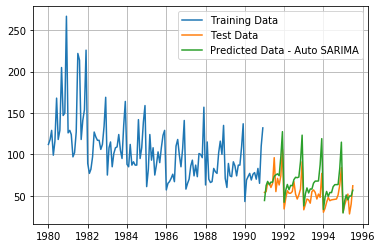

In [641]:
plt.plot(train.Rose,label='Training Data')
plt.plot(test.Rose,label='Test Data')
plt.plot(test.index,predicted_auto_SARIMA_12.predicted_mean, label='Predicted Data - Auto SARIMA')
plt.legend(loc='best')
plt.grid();

In [642]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(0,1,2)(2,1,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE
"ARIMA(0,1,2)",15.618281
"SARIMA(0,1,2)(2,1,2,12)",16.499124


# Building the ARIMA Model looking at ACF and PACF plot

<Figure size 720x720 with 0 Axes>

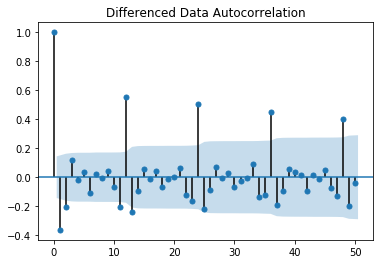

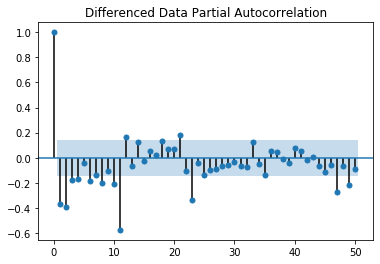

In [643]:
#lets look at the ACF and PACF plot
plt.figure(figsize = (10,10))
plot_acf(rose['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(rose['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

Here, we have taken alpha=0.05.

The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the lag at which the PACF plot cuts-off to 0.

The Moving-Average parameter in an ARIMA model is 'q' which comes from the lag at which the ACF plot cuts-off to 0.

By looking at the above plots, we can say that both the PACF cuts-off at lag 2 and ACF cuts-off at lag 1.

In [644]:
manual_ARIMA = ARIMA(train['Rose'], order=(2,1,1))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -634.523
Method:                       css-mle   S.D. of innovations             30.176
Date:                Sun, 13 Sep 2020   AIC                           1279.046
Time:                        18:10:49   BIC                           1293.422
Sample:                    02-01-1980   HQIC                          1284.887
                         - 12-01-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4915      0.080     -6.148      0.000      -0.648      -0.335
ar.L1.D.Rose     0.2127      0.088      2.409      0.016       0.040       0.386
ar.L2.D.Rose    -0.0759      0.089     -0.85

# Predict on the Test Set using this model and evaluate the model.

In [645]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [646]:
rmse = mean_squared_error(test['Rose'],predicted_manual_ARIMA[0],squared=False)
print(rmse)

15.4356712857513


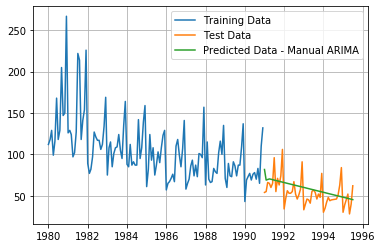

In [647]:
plt.plot(train.Rose,label='Training Data')
plt.plot(test.Rose,label='Test Data')
plt.plot(test.index,predicted_manual_ARIMA[0], label='Predicted Data - Manual ARIMA')
plt.legend(loc='best')
plt.grid();

In [648]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['Manual ARIMA(2,1,1)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE
"ARIMA(0,1,2)",15.618281
"SARIMA(0,1,2)(2,1,2,12)",16.499124
"Manual ARIMA(2,1,1)",15.435671


# Building the SARIMA model looking at ACF and PACF curve

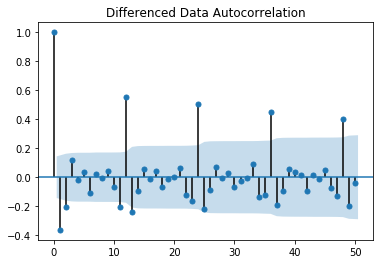

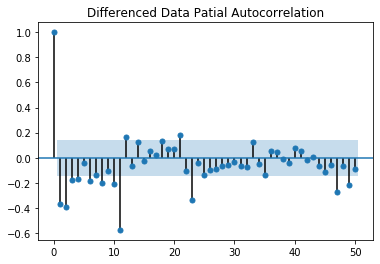

In [649]:
plot_acf(rose['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(rose['Rose'].diff().dropna(),lags=50,title='Differenced Data Patial Autocorrelation')
plt.show()

We see that our ACF plot at the seasonal interval (12) does not taper off. So, we go ahead and take a seasonal differencing of the original series. Before that let us look at the original series.

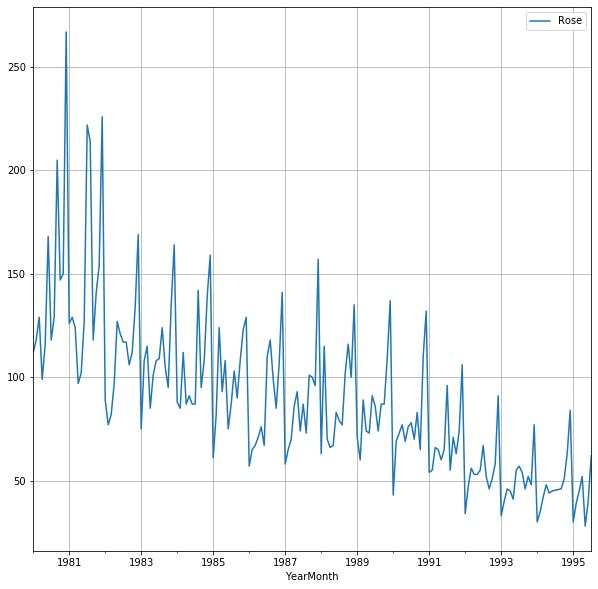

In [650]:
rose.plot(figsize = (10,10))
plt.grid();

We see that there is a trend and a seasonality. So, now we take a seasonal differencing and check the series.

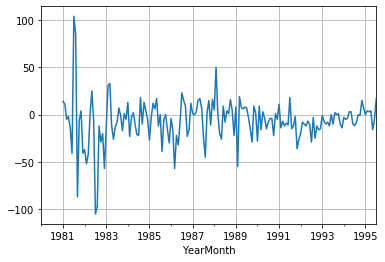

In [651]:
(rose['Rose'].diff(12)).plot()
plt.grid();

We see that there might be a slight trend which can be noticed in the data. So we take a differencing of first order on the seasonally differenced series.

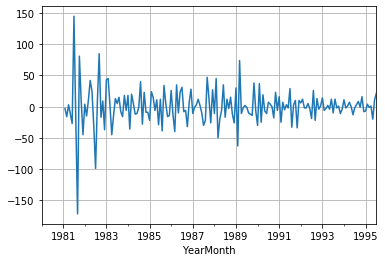

In [652]:
(rose['Rose'].diff(12)).diff().plot()
plt.grid();

Now we see that there is almost no trend present in the data. Seasonality is only present in the data.

Let us go ahead and check the stationarity of the above series before fitting the SARIMA model.

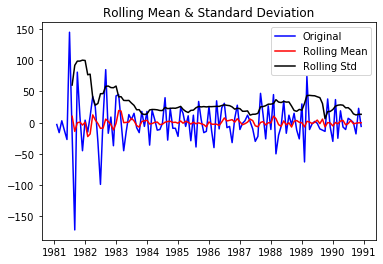

Results of Dickey-Fuller Test:
Test Statistic                  -3.692348
p-value                          0.004222
#Lags Used                      11.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64 



In [653]:
test_stationarity((train['Rose'].diff(12).dropna()).diff(1).dropna())

P is low, so we reject the null hypothesis. Hence the series is stationary.

Checking the ACF and the PACF plots for the new modified Time Series.

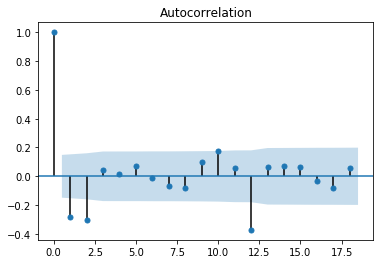

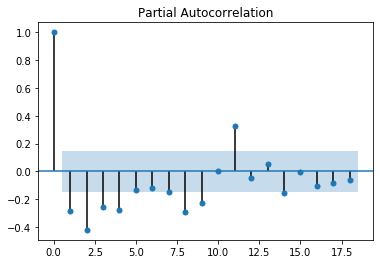

In [654]:
plot_acf((rose['Rose'].diff(12).dropna()).diff(1).dropna(),lags=18)
plot_pacf((rose['Rose'].diff(12).dropna()).diff(1).dropna(),lags=18);

Here, we have taken alpha=0.05.

We are going to take the seasonal period as 12. We will keep the p(2) and q(1) parameters same as the ARIMA model.

The Auto-Regressive parameter in an SARIMA model is 'P' which comes from the lag at which the PACF plot cuts-off to 0.

The Moving-Average parameter in an SARIMA model is 'q' which comes from the lag at which the ACF plot cuts-off to 0. 

By looking at the above plots, we can say that  the PACF cuts-off at lag 4 and ACF cuts-off at lag 2.

In [655]:
#fitting the training set
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(2, 1, 1),
                                seasonal_order=(4, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA_6.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                  132
Model:             SARIMAX(2, 1, 1)x(4, 1, [1, 2], 12)   Log Likelihood                -287.083
Date:                                 Sun, 13 Sep 2020   AIC                            594.166
Time:                                         18:11:14   BIC                            616.507
Sample:                                              0   HQIC                           603.030
                                                 - 132                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0167      0.167     -0.100      0.920      -0.343       0

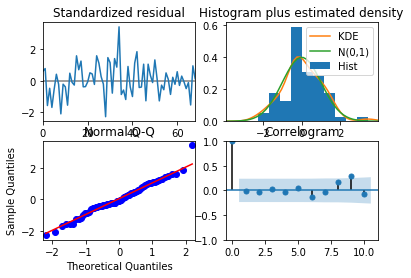

In [656]:
results_manual_SARIMA.plot_diagnostics()
plt.show()

## Predict on the Test Set using this model and evaluate the model.


In [657]:
predicted_manual_SARIMA= results_manual_SARIMA.get_forecast(steps=len(test))

In [658]:
predicted_manual_SARIMA.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,45.379515,15.281730,15.427875,75.331155
1,65.611889,15.363432,35.500116,95.723663
2,65.446489,15.445638,35.173595,95.719384
3,64.173627,15.548790,33.698559,94.648695
4,63.824745,15.650872,33.149599,94.499891


In [659]:
rmse = mean_squared_error(test['Rose'],predicted_manual_SARIMA.predicted_mean,squared=False)
print(rmse)

17.423824252220324


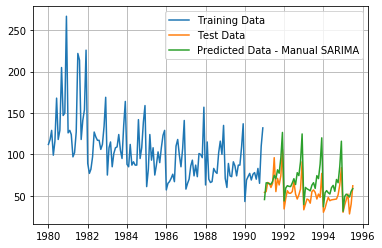

In [660]:
plt.plot(train.Rose,label='Training Data')
plt.plot(test.Rose,label='Test Data')
plt.plot(test.index,predicted_manual_SARIMA.predicted_mean, label='Predicted Data - Manual SARIMA')
plt.legend(loc='best')
plt.grid();

In [661]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=[' Manual SARIMA(2,1,1)(4,1,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE
"ARIMA(0,1,2)",15.618281
"SARIMA(0,1,2)(2,1,2,12)",16.499124
"Manual ARIMA(2,1,1)",15.435671
"Manual SARIMA(2,1,1)(4,1,2,12)",17.423824


Based on the above inference, the best suited model for the data is manual ARIMA model.

However we know that there is a seasonality component in the data, so will build final model using auto SARIMA Model.

# Building the most optimum model on the Full Data.


In [662]:
full_data_model = sm.tsa.statespace.SARIMAX(rose['Rose'],
                                order=(2,1,1),
                                seasonal_order= (2,1,2,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                    Rose   No. Observations:                  187
Model:             SARIMAX(2, 1, 1)x(2, 1, [1, 2], 12)   Log Likelihood                -593.294
Date:                                 Sun, 13 Sep 2020   AIC                           1202.587
Time:                                         18:12:27   BIC                           1226.565
Sample:                                     01-01-1980   HQIC                          1212.329
                                          - 07-01-1995                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0710      0.094      0.753      0.452      -0.114       0

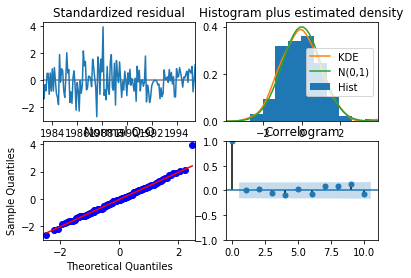

In [663]:
results_full_data_model.plot_diagnostics();

# Evaluate the model on the whole and predict 12 months into the future (till the end of next year).

In [664]:
predicted_SARIMA_full_data = results_full_data_model.get_forecast(steps=12)

In [665]:
rmse = mean_squared_error(rose['Rose'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 33.62538746093622


In [666]:
pred_full_SARIMA_date = predicted_SARIMA_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-31',end='1996-07-31', freq='M'))

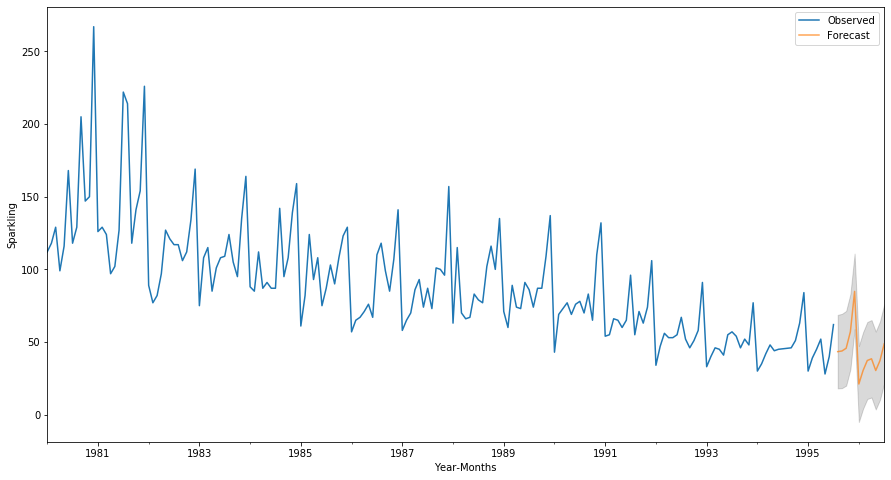

In [667]:
# plot the forecast along with the confidence band
plt.figure(figsize = (15,8))
axis = rose['Rose'].plot(label='Observed')
pred_full_manual_ARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_ARIMA_date.index, pred_full_manual_ARIMA_date['mean_ci_lower'], 
                  pred_full_manual_ARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.show()